In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 운영 체제마다 한글이 보이게 하는 설정
# 윈도우
import platform
import matplotlib
from matplotlib import font_manager, rc

# '-' 기호 보이게 하기
matplotlib.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Windows':
    path = "C:\Windows\Fonts\malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
# 맥
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
# 리눅스
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')

<>:11: SyntaxWarning: invalid escape sequence '\W'
<>:11: SyntaxWarning: invalid escape sequence '\W'
C:\Users\노준영\AppData\Local\Temp\ipykernel_8568\1115883365.py:11: SyntaxWarning: invalid escape sequence '\W'
  path = "C:\Windows\Fonts\malgun.ttf"


In [3]:
file_path = './국민건강보험공단_건강검진정보_2023.csv'
data = pd.read_csv(file_path, encoding='euc-kr')

data.head()

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),...,혈청지피티(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치 유무,치아마모증유무,제3대구치(사랑니) 이상,치석
0,2023,34735,46,2,9,155,70,92.0,1.2,1.2,...,24.0,50.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
1,2023,4105118,11,1,17,160,55,86.0,0.9,9.9,...,11.0,31.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
2,2023,362482,36,2,13,150,65,96.0,1.0,0.8,...,29.0,24.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
3,2023,653166,11,1,13,160,70,85.0,1.0,1.2,...,21.0,27.0,3.0,1.0,1,0.0,NaN,NaN,NaN,0.0
4,2023,4152237,41,1,12,165,65,84.5,1.0,1.2,...,33.0,49.0,3.0,1.0,0,NaN,NaN,NaN,NaN,NaN


In [4]:
data.shape

(1000000, 33)

In [5]:
data.columns

Index(['기준년도', '가입자일련번호', '시도코드', '성별코드', '연령대코드(5세단위)', '신장(5cm단위)',
       '체중(5kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치 유무', '치아마모증유무', '제3대구치(사랑니) 이상',
       '치석'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 33 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   기준년도           1000000 non-null  int64  
 1   가입자일련번호        1000000 non-null  int64  
 2   시도코드           1000000 non-null  int64  
 3   성별코드           1000000 non-null  int64  
 4   연령대코드(5세단위)    1000000 non-null  int64  
 5   신장(5cm단위)      1000000 non-null  int64  
 6   체중(5kg단위)      1000000 non-null  int64  
 7   허리둘레           999589 non-null   float64
 8   시력(좌)          999816 non-null   float64
 9   시력(우)          999823 non-null   float64
 10  청력(좌)          999863 non-null   float64
 11  청력(우)          999862 non-null   float64
 12  수축기혈압          994253 non-null   float64
 13  이완기혈압          994253 non-null   float64
 14  식전혈당(공복혈당)     994186 non-null   float64
 15  총콜레스테롤         338606 non-null   float64
 16  트리글리세라이드       338606 non-null   float64
 17  HDL콜레스테롤 

In [7]:
data['HDL콜레스테롤']

0         46.0
1          NaN
2         52.0
3         45.0
4          NaN
          ... 
999995     NaN
999996    59.0
999997     NaN
999998     NaN
999999     NaN
Name: HDL콜레스테롤, Length: 1000000, dtype: float64

# 데이터 전처리

## 1) 결측치 처리

전체 결측치인 컬럼: '결손치 유무', '치아마모증유무', '제3대구치(사랑니) 이상'

약 65%가 결측치인 컬럼: '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '치아우식증유무', '치석'

약 1% 이내가 결측치인 컬럼: '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', '혈색소', '요단백', '혈청크레아티닌', '혈청지오티(AST)', 
                            '혈청지피티(ALT)', '감마지티피', '흡연상태', '음주여부'

전체 결칙치인 컬럼은 제거하고, 데이터가 1000000건으로 충분하기 때문에 약 65%인 컬럼은 결측치를 제거하고 따로 보고,

약 1% 이내가 결측치인 컬럼도 데이터가 많기 때문에 정확성을 올리기 위해 결측치를 제거하겠다.

In [8]:
data['기준년도'].value_counts()

기준년도
2023    1000000
Name: count, dtype: int64

In [9]:
# 기준년도도 모두 2023이니 제거, 구강검진수검여부가 0인값은 결측치이고, 모두 1인 값만 남을테니 제거
drop_col = ['기준년도', '결손치 유무', '치아마모증유무', '제3대구치(사랑니) 이상', '구강검진수검여부']
drop_col65 = ['총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '치아우식증유무', '치석']
drop_col1 = ['허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', '혈색소', '요단백', '혈청크레아티닌', '혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피', '흡연상태', '음주여부']

# 전체 결측치인 행 제거
data = data.drop(columns=drop_col)

# 약 65% 결측치 행 제거
data1 = data.drop(columns=drop_col65)
data1 = data1.dropna()

# 약 1% 결측치 행 제거
data2 = data.dropna()

In [10]:
data.head()

,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),청력(좌),...,혈색소,요단백,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피,흡연상태,음주여부,치아우식증유무,치석
0,34735,46,2,9,155,70,92.0,1.2,1.2,1.0,...,13.8,1.0,0.5,26.0,24.0,50.0,1.0,1.0,NaN,NaN
1,4105118,11,1,17,160,55,86.0,0.9,9.9,1.0,...,15.5,1.0,1.3,22.0,11.0,31.0,1.0,1.0,NaN,NaN
2,362482,36,2,13,150,65,96.0,1.0,0.8,1.0,...,13.5,1.0,1.1,22.0,29.0,24.0,1.0,1.0,NaN,NaN
3,653166,11,1,13,160,70,85.0,1.0,1.2,1.0,...,15.6,1.0,0.9,22.0,21.0,27.0,3.0,1.0,0.0,0.0
4,4152237,41,1,12,165,65,84.5,1.0,1.2,1.0,...,14.9,1.0,0.8,23.0,33.0,49.0,3.0,1.0,NaN,NaN


In [11]:
data1.shape

(988007, 22)

In [12]:
data1.isna().sum().sum()

0

In [13]:
data1.head()

,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),청력(좌),...,이완기혈압,식전혈당(공복혈당),혈색소,요단백,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피,흡연상태,음주여부
0,34735,46,2,9,155,70,92.0,1.2,1.2,1.0,...,89.0,98.0,13.8,1.0,0.5,26.0,24.0,50.0,1.0,1.0
1,4105118,11,1,17,160,55,86.0,0.9,9.9,1.0,...,52.0,87.0,15.5,1.0,1.3,22.0,11.0,31.0,1.0,1.0
2,362482,36,2,13,150,65,96.0,1.0,0.8,1.0,...,69.0,114.0,13.5,1.0,1.1,22.0,29.0,24.0,1.0,1.0
3,653166,11,1,13,160,70,85.0,1.0,1.2,1.0,...,64.0,98.0,15.6,1.0,0.9,22.0,21.0,27.0,3.0,1.0
4,4152237,41,1,12,165,65,84.5,1.0,1.2,1.0,...,86.0,105.0,14.9,1.0,0.8,23.0,33.0,49.0,3.0,1.0


In [14]:
data2.shape

(105500, 28)

In [15]:
data2.isna().sum().sum()

0

In [16]:
data2.head()

,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),청력(좌),...,혈색소,요단백,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피,흡연상태,음주여부,치아우식증유무,치석
3,653166,11,1,13,160,70,85.0,1.0,1.2,1.0,...,15.6,1.0,0.9,22.0,21.0,27.0,3.0,1.0,0.0,0.0
19,554634,41,1,8,170,80,93.0,1.2,1.2,1.0,...,16.7,2.0,1.1,25.0,40.0,27.0,2.0,1.0,1.0,0.0
30,804807,41,1,9,180,85,96.1,0.1,0.2,1.0,...,16.6,1.0,0.8,25.0,57.0,41.0,2.0,1.0,0.0,0.0
32,1472751,41,1,17,165,70,91.0,1.0,0.9,2.0,...,14.1,1.0,0.9,24.0,25.0,16.0,3.0,1.0,0.0,0.0
59,3255397,11,1,13,175,105,104.0,1.2,1.2,1.0,...,15.5,1.0,0.8,20.0,21.0,27.0,3.0,1.0,0.0,1.0


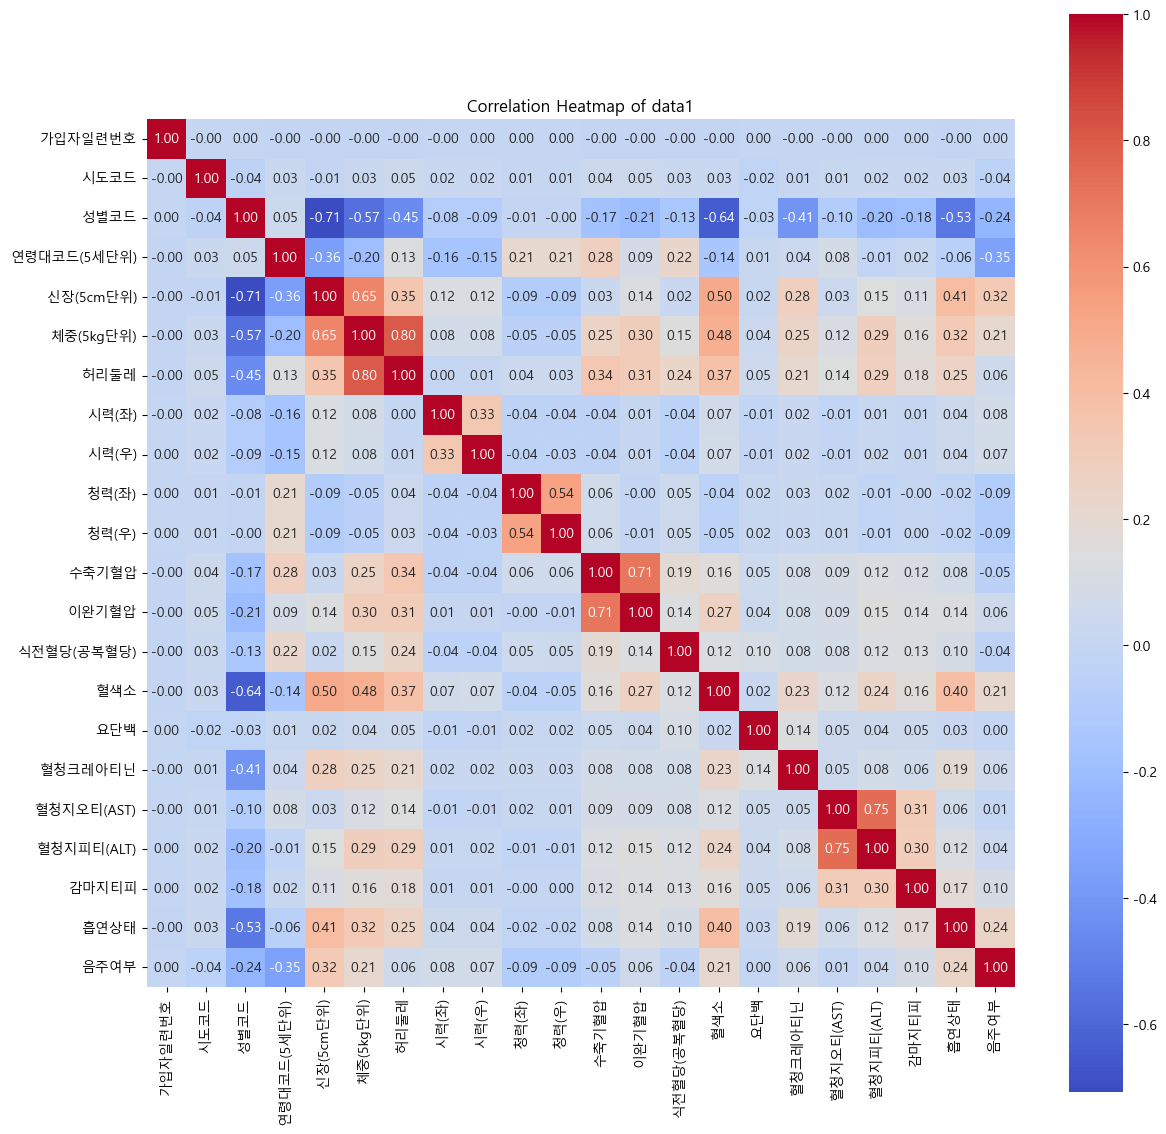

In [22]:
plt.figure(figsize=(14, 14))
sns.heatmap(data1.corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar=True)
plt.title("Correlation Heatmap of data1")
plt.show()

**높은 상관관계를 보이는 변수**
- 신장(5cm단위), 성별코드 0.75 (성별: 1: 남자, 0: 여자)
- 체중(5kg단위), 신장(5kg단위) 0.65
- 허리둘레, 체중(5kg단위) 0.80
- 이완기혈압, 수축기혈압 0.71
- 혈색소, 성별코드 0.64
- 혈청지피티(ALT), 혈청지오티(AST) 0.75

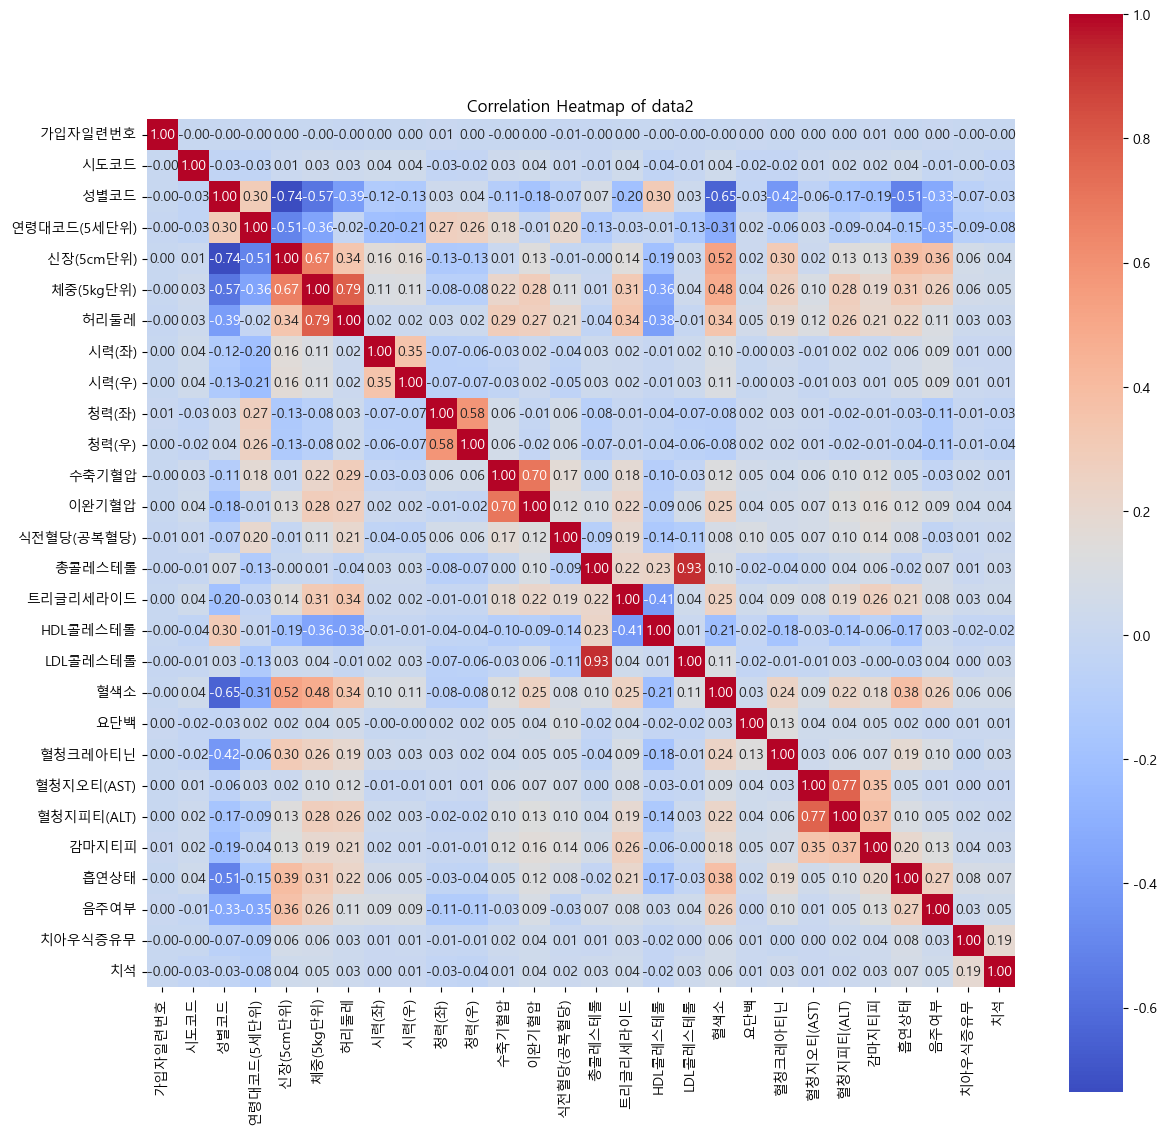

In [23]:
plt.figure(figsize=(14, 14))
sns.heatmap(data2.corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar=True)
plt.title("Correlation Heatmap of data2")
plt.show()

**높은 상관관계를 보이는 변수** (중복변수 제거)
- LDL콜레스테롤, 총콜레스테롤  0.93